In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import splat
import astropy.units as u
import popsims
splat.initializeStandards(all=True)
from scipy import interpolate
%matplotlib inline

In [2]:
files=glob.glob('/users/caganze/research/wisps/data/primevalspectra/*.fits')

In [58]:
#files

In [63]:
def get_spectrum(f):
        hdu=fits.open(f)[0]
        wave=np.array([hdu.header['CRVAL1']+hdu.header['CDELT1']*x for x \
          in range(0, hdu.header['NAXIS1'])])*u.angstrom.to(u.micron)
        flux= hdu.data*u.erg/(u.cm**2 * u.s * u.micron)
        s=splat.Spectrum(wave=wave, flux=flux, noise=flux/1000)
        #s.toInstrument('SpeX')
        #plt.plot(s.wave, s.flux)
        return s

In [72]:
def interpolated_standards():
    stds=splat.STDS_DWARF_SPEX
    interpstds={}
    for k in stds.keys():
        s=stds[k]
        print (k)
        s.normalize()
        s.toInstrument('WFC3-G141')
        interpstds[k]=(interpolate.interp1d(s.wave.value, s.flux.value), interpolate.interp1d(s.wave.value, s.noise.value))
    return interpstds

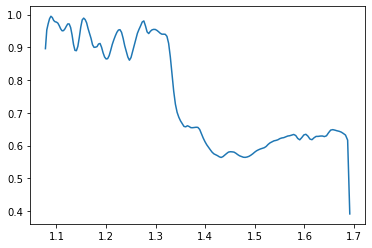

In [78]:
s=splat.STDS_DWARF_SPEX['M8.0']
plt.plot(s.wave,s.flux)

In [73]:
interpolated_standards()

M0.0
M1.0
M2.0
M3.0
M4.0
M5.0
M6.0


LinAlgError: SVD did not converge in Linear Least Squares